In [279]:
## BAX 452 001-002 WQ 2024 Machine Learning
## Assignment 5
## Group 5
## Richard Liu, Hitesh Kunchakuri, Shivank Chandra

In [299]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV


In [281]:
directory_path = '/Users/richardaliu/Downloads/Winter/BAX 452/hw6'
os.chdir(directory_path)
current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: /Users/richardaliu/Downloads/Winter/BAX 452/hw6


1. This is the same dataset introduced in assignment 1 for which we built a linear regression
model to predict estimated shares outstanding

a. Load the data and drop 'Ticker Symbol’, ‘Period Ending’, ‘For Year'
 Drop NA

In [282]:
fundamental = 'fundamentals.csv'
df = pd.read_csv(fundamental)

In [283]:
np.random.seed(seed=5566)

In [284]:
#drop column

df.drop(['Ticker Symbol', 'Period Ending', 'For Year'], axis=1, inplace=True)


In [285]:
#drop na
df = df.dropna()

b. Split data set with 70% train and 30% test then build random forest model. Default
every (hyper-)parameter then compute MSE.

In [286]:
X = df.drop('Estimated Shares Outstanding', axis=1)
y = df['Estimated Shares Outstanding']

In [287]:
rf_model = RandomForestRegressor(n_estimators=500, oob_score=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)


In [288]:
mse = mean_squared_error(y_test, rf_predictions)
print(mse)

1.2565977163137494e+17


c. Build random forest with min_samples_split set to 3. Compare with random forest
model in (b). Explain. (15 pts)

In [289]:
rf_model_min = RandomForestRegressor(min_samples_split=3, n_estimators=500, oob_score=True)

rf_model_min.fit(X_train, y_train)

rf_predictions_min = rf_model_min.predict(X_test)

In [290]:
mse_min = mean_squared_error(y_test, rf_predictions_min)

print(mse_min)

1.2914021144119866e+17


Comment: The first random forest model has a slightly lower MSE, indicates that it performs a bit better than the sceond model with min sample split set. This might suggest that smaller value may create more complex model, which affects the overall performance. 

d. Use "Mean Decrease in Impurity" and "Permutation Feature Importance" to compute the
variable importance of the random forest in (c). Explain how each method computes the variable
importance and compare their results. (15 pts)

In [291]:
trees = rf_model_min.estimators_


In [292]:

feature_names = X.columns.tolist()


mdi_importances_min = pd.Series(
    rf_model_min.feature_importances_, index=feature_names
).sort_values(ascending=True)

<Axes: >

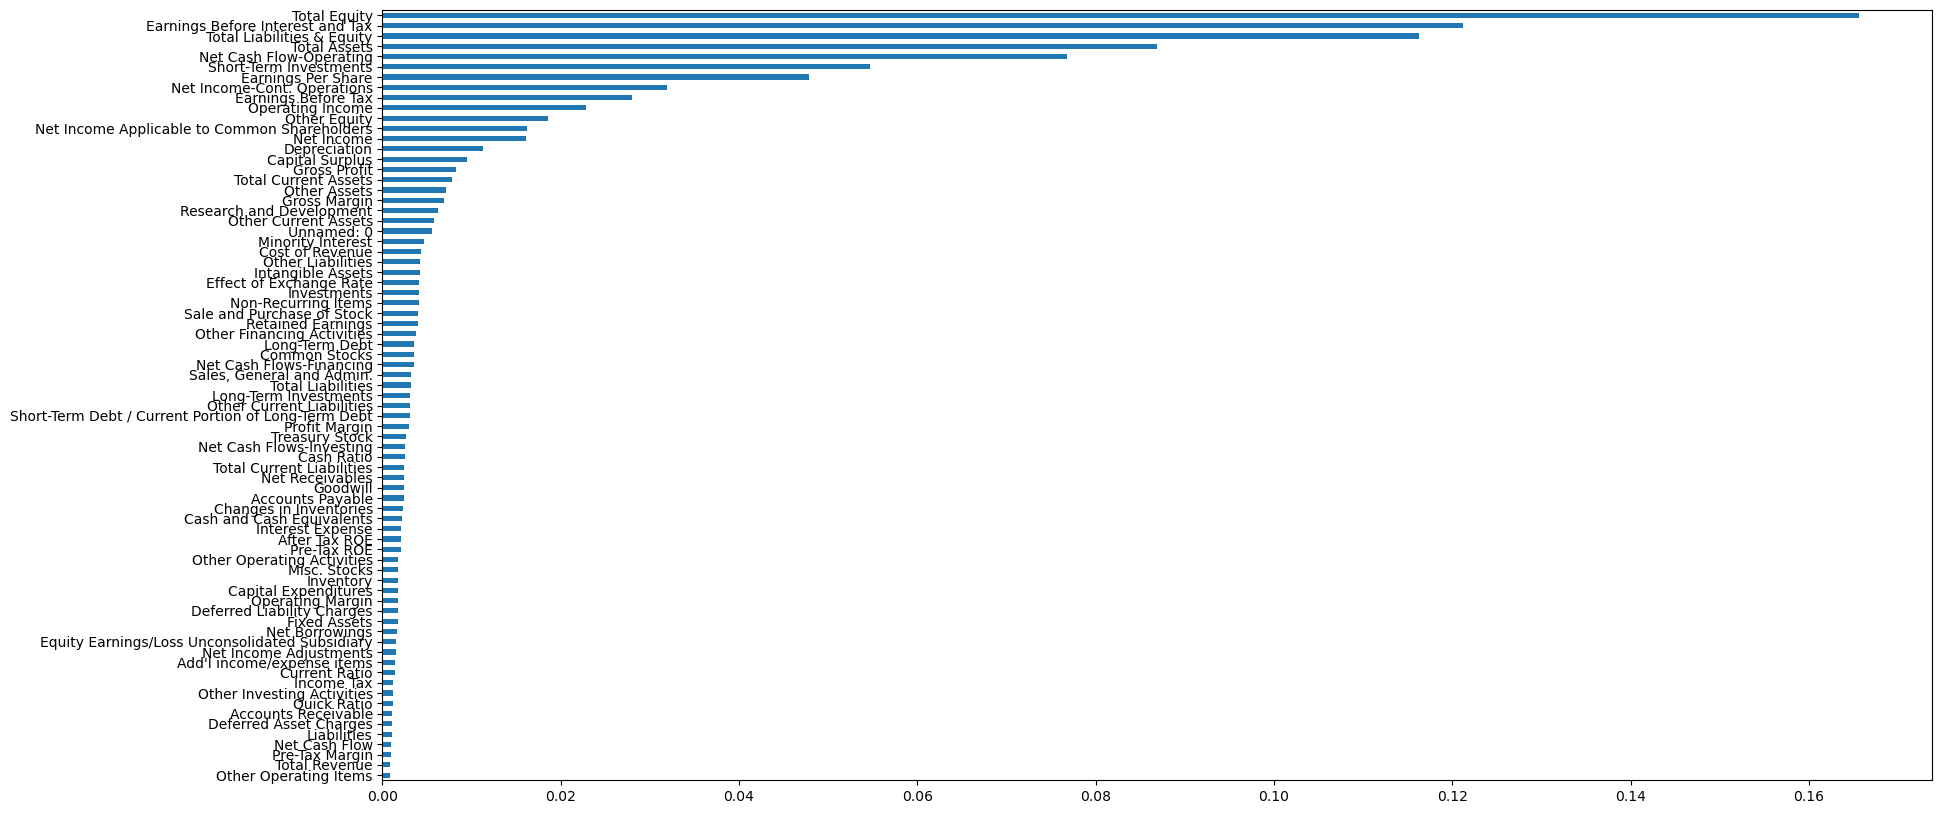

In [297]:
plt.figure(figsize=(20,10))
mdi_importances_min.plot.barh()

Comment: From the Mean Decrease in Impurity, we can see that total equity and earning before interest and tax are the most important features. 

e. Use the same split to build lasso regression. Compare with last model (c). (15 pts)

In [300]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [301]:
lasso_model = Lasso(alpha=20)

# Fit Lasso model to the scaled training data
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the training and test sets
y_pred_lasso = lasso_model.predict(X_test_scaled)

/Users/richardaliu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.522e+19, tolerance: 9.190e+16
  


In [304]:
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)
rmse = np.sqrt(mse)

print(f'OOS Mean Squared Error: {mse}')
print(f'OOS Root Mean Squared Error: {rmse}')
print(f'OOS R-squared (R2) Score: {r2}')

OOS Mean Squared Error: 1.9516783968188317e+17
OOS Root Mean Squared Error: 441778043.45834476
OOS R-squared (R2) Score: 0.7944430304053232


Comparing Lasso method to the last model, we can see that Lasso results with a higher MSE. This tells us that even with min sample split set, random forest still performs better than Lasso. 

2. Decision Tree Classification

In [236]:
np.random.seed(seed=5566)

a. Use the breast cancer dataset to build decision tree classifier to predict the diagnosis. Split
the data into 70% train and 30% test. (10 pts) (Default every parameter)

In [237]:
breast = 'breast_cancer.csv'
df2 = pd.read_csv(breast, index_col=0)

In [238]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [239]:
df2.rename({"Unnamed: 32":"a"}, axis="columns", inplace=True)
df2.drop(["a"], axis=1, inplace=True)

In [240]:
df2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [241]:
X = df2.drop('diagnosis', axis=1)
y = df2['diagnosis']

classifier = DecisionTreeClassifier(max_depth=3) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

classifier.fit(X_train, y_train)

classifier_pred = classifier.predict(X_test)

b.Print Confusion matrix and explain. Hint: A confusion matrix is a table used in machine
learning to visualize the performance of a classification model by showing the actual vs.
predicted values, helping to identify the types of errors made by the model. Typically, the actual
labels are on the vertical axis (rows), and the predicted labels are on the horizontal axis
(columns). (10 pts)

In [242]:
confusion_matrix = confusion_matrix(y_test, classifier_pred)

print(confusion_matrix)


[[96 12]
 [ 8 55]]


The confusion matrix shows that there are 96 instances correcly predicted as negative class, 12 instances wrongly predicted as positive class while they are acutally negative, 8 instances were wrongly predicted as negative class while they are actually positive, and 55 instances were correcly predicted as positive class. Overall, the accuracy of the classifier is 0.883.

c.Visualize the tree. What variables are in the plot?

In [243]:
class_names=classifier.classes_

In [244]:
class_names_str = classifier.classes_.astype(str).tolist()

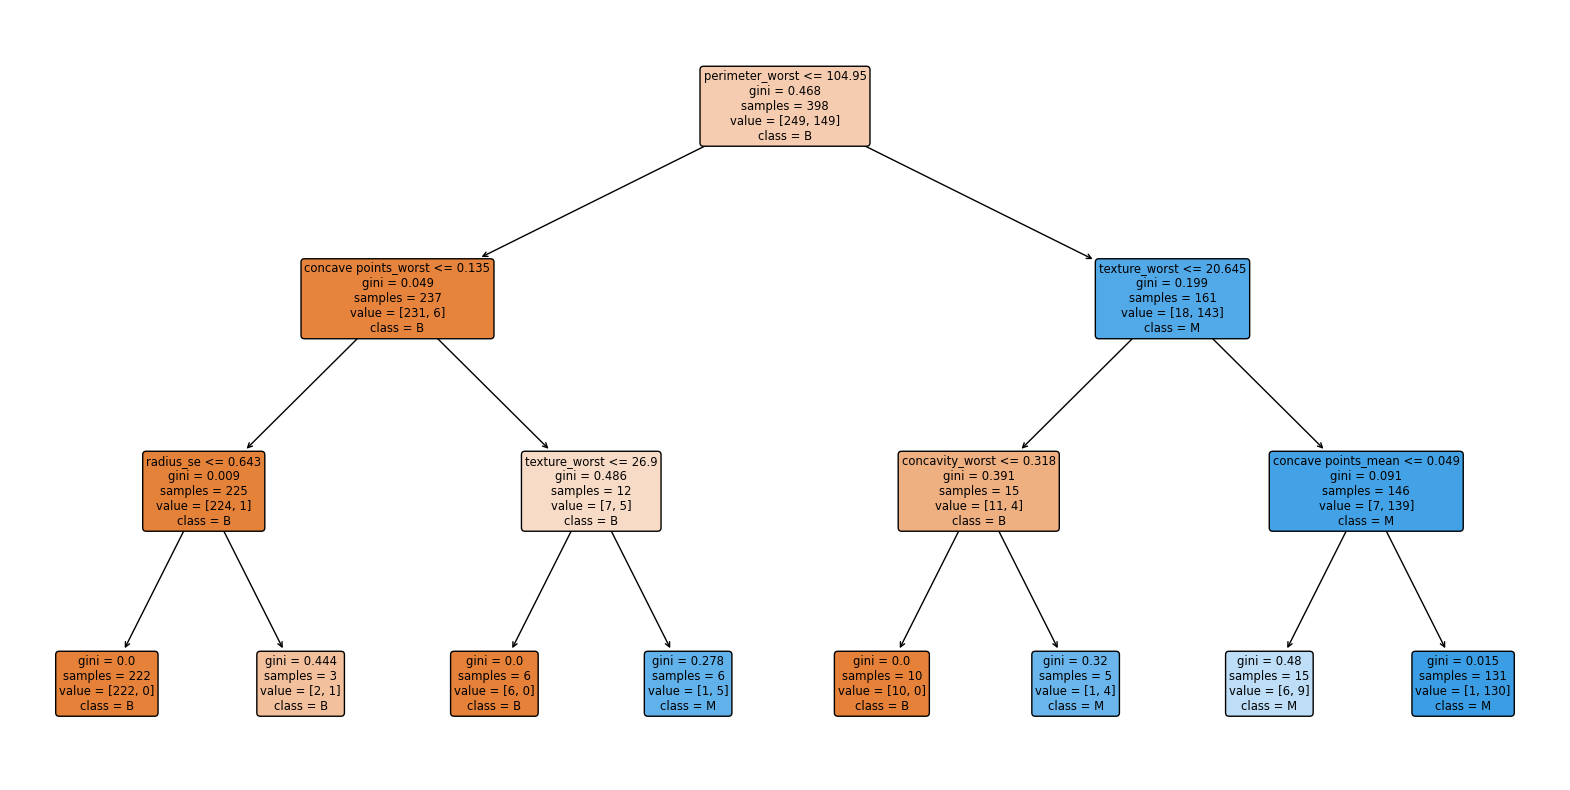

In [245]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(classifier, feature_names=X.columns.tolist(), class_names=class_names_str, filled=True, rounded=True)
plt.show()



d. No code required: would you consider pruning this tree? Why? Where? Explain how you
would go about deciding where to prune the tree? What measures would you use?

In this case, I would not consider pruning this tree since there is no evidence of overfitting. The tree is not very deep and there is not many long branches. 
When deciding to prune the tree, I would look for the leaf or the nodes at the end of the tree. This can reduce the complexity and noises.

Some measures I would use are Cross Validation and Cost complexity parameter. 